<a href="https://colab.research.google.com/github/0karim0/Fandango-_Analysis/blob/main/Fandango__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()




In [2]:
fandango = pd.read_csv('fandango_scrape.csv') 


In [3]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


# **Relationship between popularity of film  and its rate  **

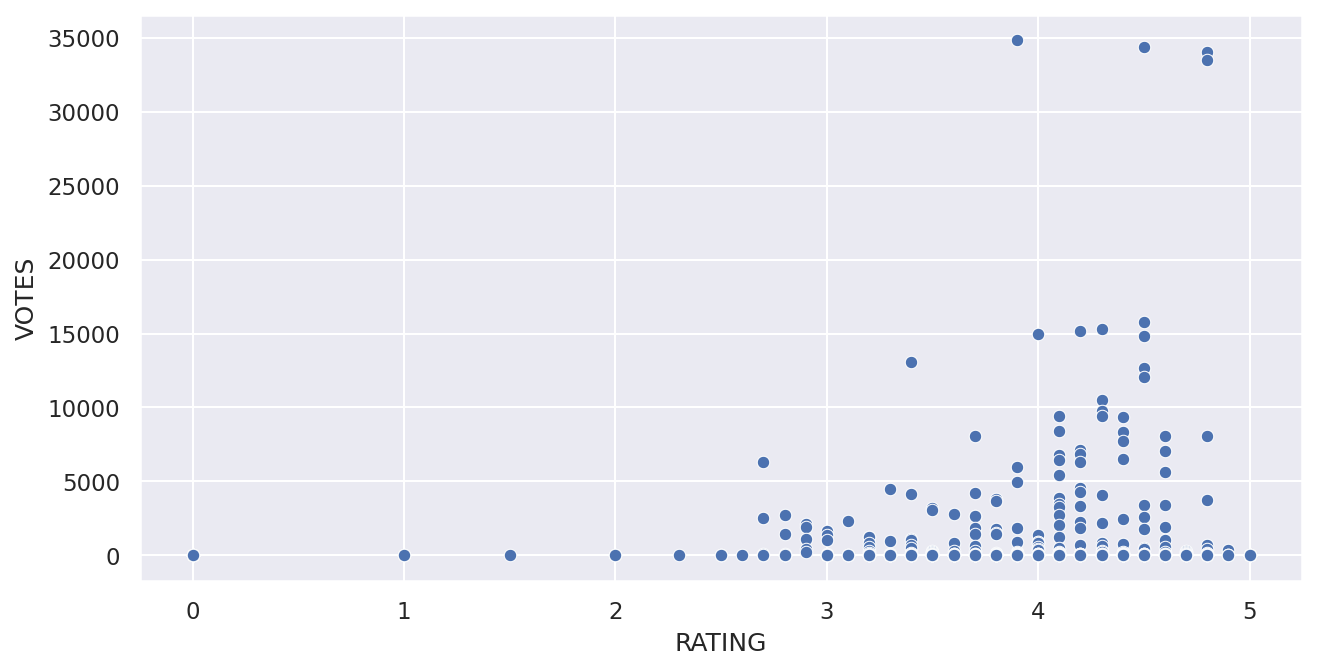

In [6]:
plt.figure(figsize=(10,5),dpi = 150)
sns.scatterplot(data = fandango , x = 'RATING' , y = 'VOTES');

In [7]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


# **Create new column name year**

In [8]:
fandango["YEAR"] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')',""))

In [9]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [10]:
fandango["YEAR"].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

# **Count of movie per yaer**

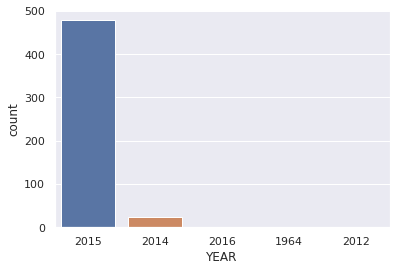

In [11]:
sns.countplot(data = fandango , x = 'YEAR')

# **10 movie with the largest number of rate**

In [12]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


# **How many movie have zero vote**

In [13]:
len(fandango[fandango['VOTES'] == 0])

69

# **Creat new DataFrame without zero votes**

In [14]:
new_fandango = fandango[fandango['VOTES'] > 0]

# **Display Stars versus what the true rating was from Votes**

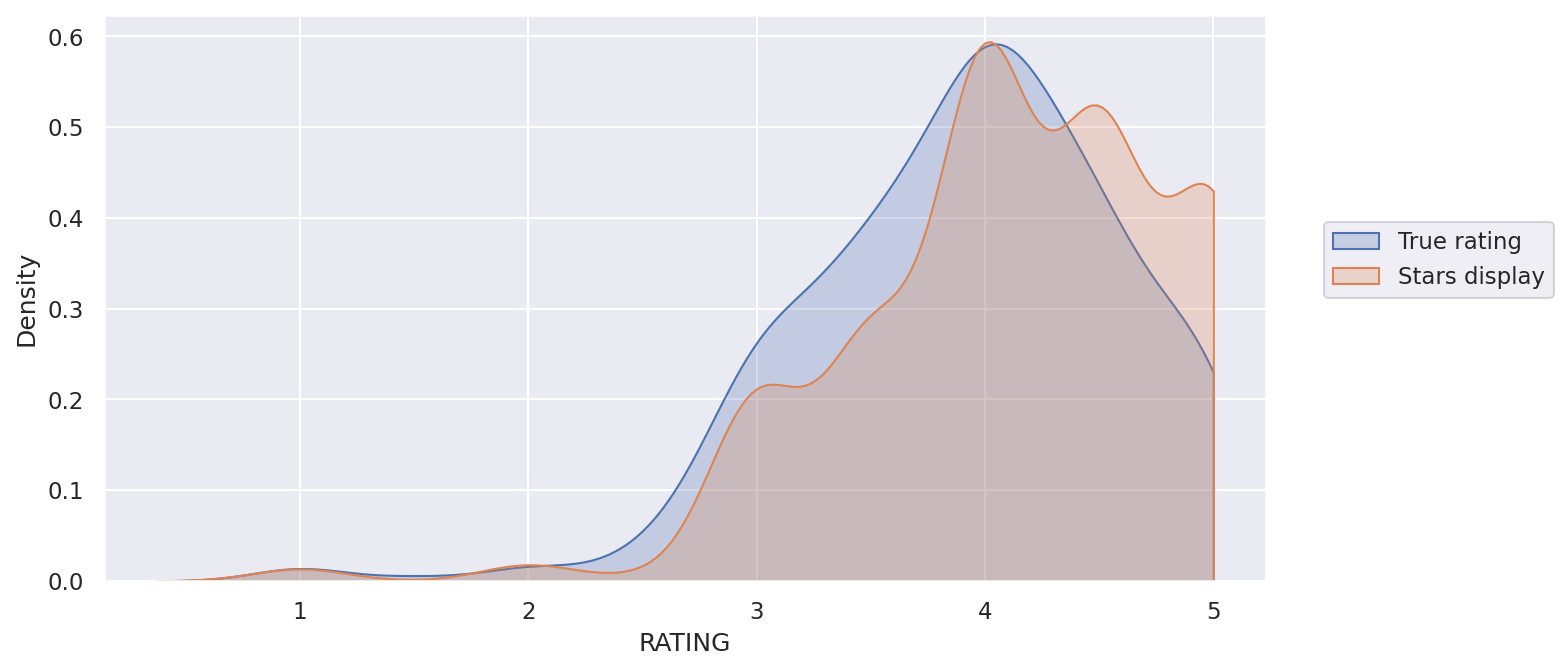

In [15]:
plt.figure(figsize = (10,5),dpi = 150)
sns.kdeplot(data = new_fandango , x = 'RATING' , clip = [0,5] , fill = True ,  label = 'True rating')
sns.kdeplot(data = new_fandango , x = 'STARS' , clip = [0,5] , fill = True  ,  label = 'Stars display')
plt.legend(loc = [1.05,0.5]);

# **Creat a new column calculate the differences between Stars and Rating **

In [15]:
new_fandango["STARS_DIFF"] = new_fandango['STARS'] - new_fandango['RATING']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
new_fandango["STARS_DIFF"] = new_fandango["STARS_DIFF"].round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Number of time certian difference occurs**

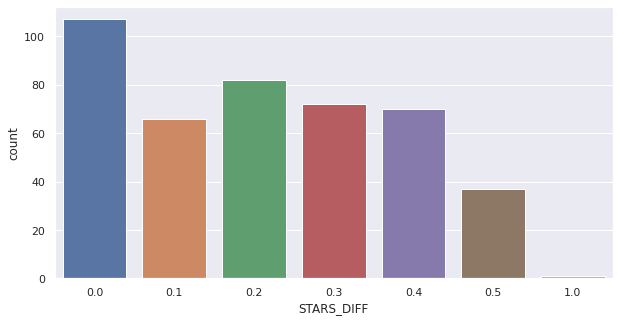

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data = new_fandango, x = "STARS_DIFF" )

In [18]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


# **Relationship between 	Rotten Tomatoes Critic reviews and 	Rotten Tomatoes User review**

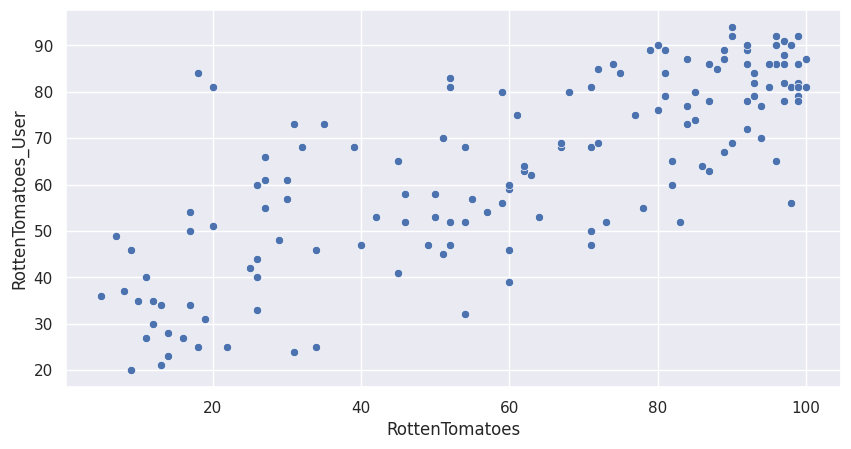

In [20]:
plt.figure(figsize= (10,5), dpi = 100 )
sns.scatterplot(data = all_sites , x = 'RottenTomatoes' , y = 'RottenTomatoes_User' );

In [21]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [22]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

# **Distribution of the difference between RottenTomatoes Critics score and  RottenTomatoes User score**

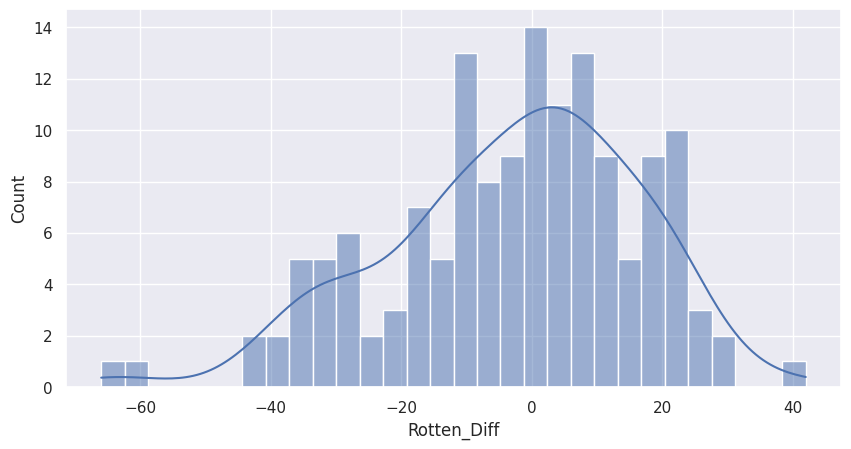

In [23]:
plt.figure(figsize = (10,5),dpi = 100 )
sns.histplot(data = all_sites,x = 'Rotten_Diff', kde =True, bins = 30 );

# **Top 5 movie users rated higher than critics on average**

In [24]:
all_sites.nsmallest(5,'Rotten_Diff')['FILM']

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

# **Top 5 critics scores higer than users  on average**

In [25]:
all_sites.nlargest(5,'Rotten_Diff')['FILM']

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

# **Display the Metacritc Rating versus the Metacritc user Rating**

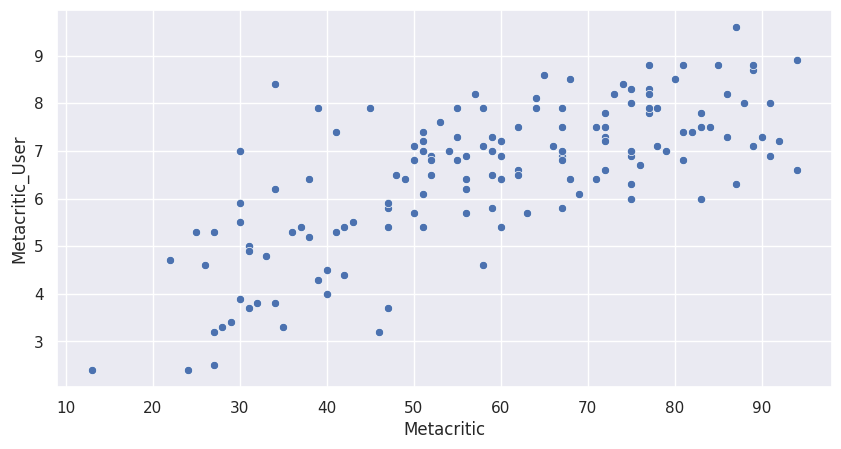

In [26]:
plt.figure(figsize = (10,5), dpi = 100)
sns.scatterplot(data = all_sites , x = 'Metacritic', y = 'Metacritic_User' );

# **Relation between vote vote count on Metacritic versus vote count on IMBD**

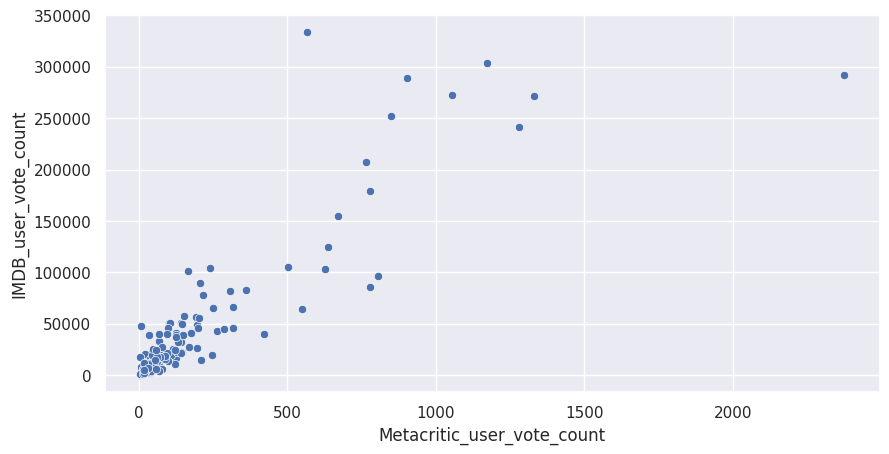

In [27]:
plt.figure(figsize = (10,5), dpi =100 )
sns.scatterplot(data = all_sites , x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count' );

# **IMDB higest rate**

In [28]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


# **movie with highest Metacritic user vote**

In [29]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [31]:
df = pd.merge(fandango, all_sites, on = 'FILM', how = 'inner')

In [32]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


# **Normalize colums to Fandango stars and Ratings 0-5**

In [36]:
df['RT_NORM'] = np.round(df['RottenTomatoes'] / 20, 1) 
df['RT_user_NORM'] = np.round(df['RottenTomatoes_Users'] / 20, 1)

In [37]:
df['Meta_Norm'] = np.round(df['Metacritic'] / 20, 1)
df['Meta_user_Norm'] = np.round(df['Metacritic_User'] / 2, 1)

In [38]:
df['IMDC_norm'] = np.round(df['IMDB'] / 2, 1)

In [39]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,Meta_Norm,Meta_user_Norm,IMDC_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.7,4.4,4.3


In [44]:
Norm_scores = df[['STARS', 'RATING','RT_NORM', 'Meta_Norm', 'Meta_user_Norm', 'IMDC_norm']]

In [45]:
Norm_scores.head()

,STARS,RATING,RT_NORM,Meta_Norm,Meta_user_Norm,IMDC_norm
0,4.0,3.9,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.7,4.4,4.3


# **Compare Distribution Of Scores Across Sites**

In [53]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

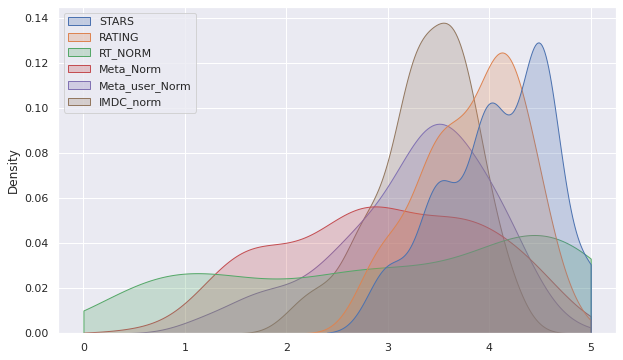

In [58]:
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(data = Norm_scores, clip = [0,5], shade = True)
move_legend(ax, "upper left")


# **Stars Display By Fandango**

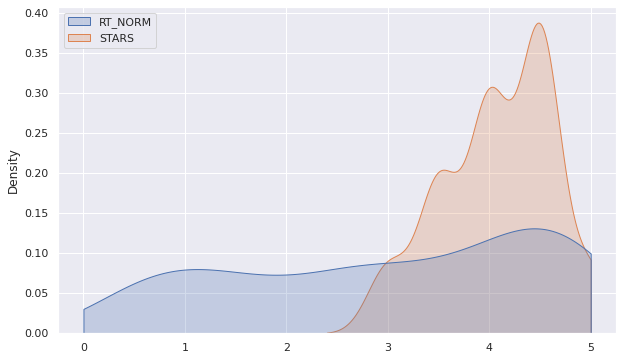

In [63]:
ig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(data = Norm_scores[['RT_NORM','STARS']], clip = [0,5], shade = True)
move_legend(ax, "upper left")

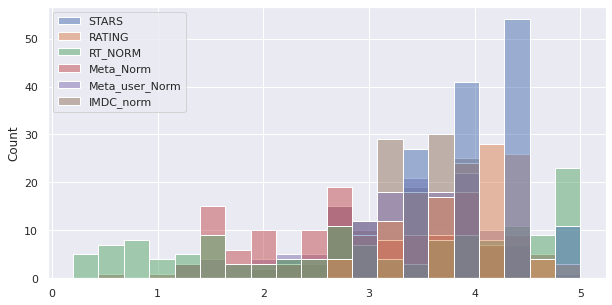

In [66]:
plt.figure(figsize = (10, 5))
sns.histplot(Norm_scores, bins = 20);